# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Задание:" data-toc-modified-id="Задание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание:</a></div>

# Задание:
    Реализовать модель логистической регрессии с использованием pytorch
    Тестовый набор данных выбирается самостоятельно

http://pytorch.org/

https://github.com/pytorch/examples

http://pytorch.org/tutorials/

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

In [3]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics
from sklearn.preprocessing import StandardScaler
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
blobs = datasets.make_blobs(centers = 2, cluster_std = 4.5, random_state=1)

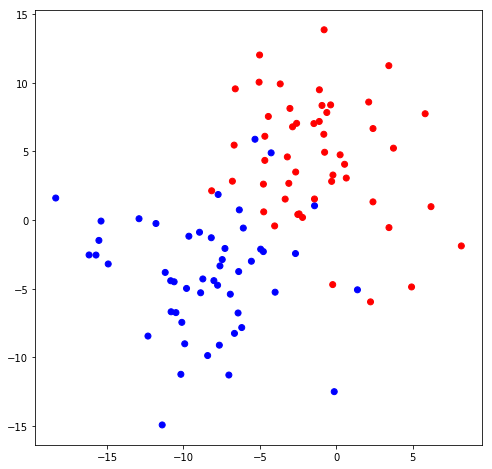

In [6]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter(list(map(lambda x: x[0], blobs[0])), list(map(lambda x: x[1], blobs[0])), c = blobs[1], cmap = colors)

In [7]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.2,
                                                                                    random_state = 1)

In [8]:
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [9]:
class LRNet(nn.Module):
    def __init__(self):
        super(LRNet, self).__init__()
        self.fc1 = nn.Linear(2, 1)
        self.ceriation = nn.BCELoss()
    def forward(self, x, target):
        x = F.sigmoid(self.fc1(x))
        loss = self.ceriation(x, target)
        return x, loss
    def name(self):
        return 'logrnet'

In [10]:
train_labels = np.array(train_labels,dtype = float)
test_labels = np.array(test_labels,dtype = float)

In [11]:
x = Variable(torch.Tensor(train_data), requires_grad=False)
y = Variable(torch.Tensor(train_labels), requires_grad=False)
xt = Variable(torch.Tensor(test_data), requires_grad=False)
yt = Variable(torch.Tensor(test_labels), requires_grad=False)

In [12]:
model = LRNet().cpu()

In [13]:
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
train_loss = []
test_loss = []
for epoch in range(100):    
    optimizer.zero_grad()
    _, loss = model(x, y)
    loss.backward()
    optimizer.step()
    _, tloss = model.forward(xt,yt)
    print ('==>>> epoch: {}, train loss: {:.6f}, test loss: {:.6f}'.format(epoch, loss.data[0], tloss.data[0]))
    train_loss.append(loss.data[0])
    test_loss.append(tloss.data[0])
    
torch.save(model.state_dict(), model.name())

==>>> epoch: 0, train loss: 0.630376, test loss: 0.473644
==>>> epoch: 1, train loss: 0.621250, test loss: 0.460108
==>>> epoch: 2, train loss: 0.604413, test loss: 0.441893
==>>> epoch: 3, train loss: 0.581520, test loss: 0.420554
==>>> epoch: 4, train loss: 0.554318, test loss: 0.397580
==>>> epoch: 5, train loss: 0.524508, test loss: 0.374287
==>>> epoch: 6, train loss: 0.493632, test loss: 0.351731
==>>> epoch: 7, train loss: 0.462986, test loss: 0.330678
==>>> epoch: 8, train loss: 0.433571, test loss: 0.311608
==>>> epoch: 9, train loss: 0.406081, test loss: 0.294750
==>>> epoch: 10, train loss: 0.380930, test loss: 0.280139
==>>> epoch: 11, train loss: 0.358295, test loss: 0.267673
==>>> epoch: 12, train loss: 0.338174, test loss: 0.257168
==>>> epoch: 13, train loss: 0.320450, test loss: 0.248401
==>>> epoch: 14, train loss: 0.304929, test loss: 0.241137
==>>> epoch: 15, train loss: 0.291391, test loss: 0.235151
==>>> epoch: 16, train loss: 0.279603, test loss: 0.230238
==>>> e

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:767: UserWarning: Using a target size (torch.Size([80])) that is different to the input size (torch.Size([80, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:767: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


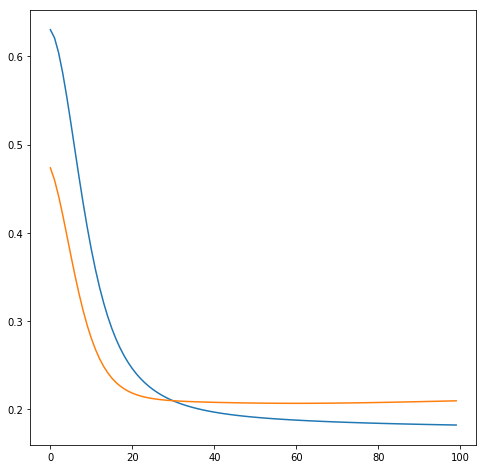

In [14]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.show()

In [15]:
LR = linear_model.LogisticRegression(random_state = 1)

In [16]:
LR.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
metrics.log_loss(train_labels, LR.predict_proba(train_data))

0.19961085860091668

In [18]:
metrics.log_loss(test_labels, LR.predict_proba(test_data))

0.21751017078772028